# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

%matplotlib inline

In [2]:
geo = pd.read_excel('geo_comment.xlsx')

In [3]:
geo.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [4]:
geo.drop('Unnamed: 0', axis=1, inplace=True)
geo.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [5]:
geo.shape

(70382, 5)

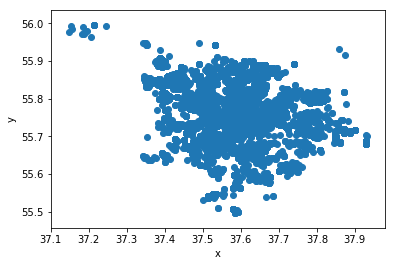

In [6]:
plt.scatter(geo['x'], geo['y'])
plt.xlabel('x')
plt.ylabel('y');

In [7]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(geo[['x', 'y']], )
    k_inertia.append(clf_kmeans.inertia_)

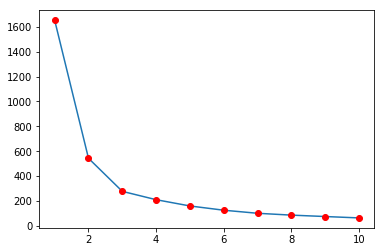

In [8]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro');
# точка перегиба - 2

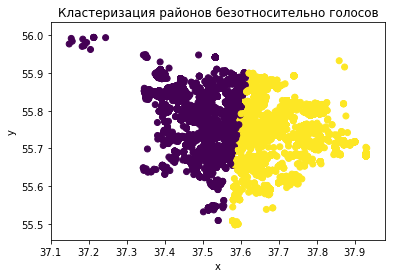

In [9]:
kmeans_geo = KMeans(n_clusters=2)
output = kmeans_geo.fit_predict(geo[['x', 'y']])
plt.scatter(geo['x'], geo['y'], c=output)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеризация районов безотносительно голосов');

In [10]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(geo[geo['comment_class'] == 1][['x', 'y']], )
    k_inertia.append(clf_kmeans.inertia_)

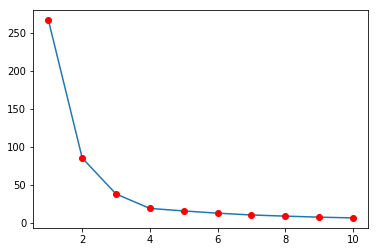

In [11]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro');
# точка перегиба - 2

In [12]:
kmeans_geo = KMeans(n_clusters=2)
output = kmeans_geo.fit_predict(geo[geo['comment_class'] == 1][['x', 'y']])

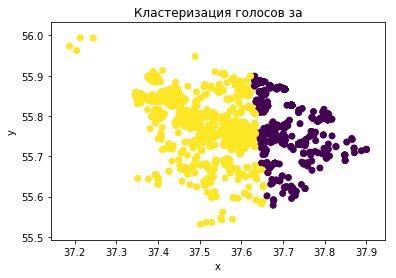

In [13]:
plt.scatter(geo[geo['comment_class'] == 1]['x'], geo[geo['comment_class'] == 1]['y'], c=output)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеризация голосов за');

In [14]:
kmeans_geo = KMeans(n_clusters=2)
output = kmeans_geo.fit_predict(geo[geo['comment_class'] == -1][['x', 'y']])

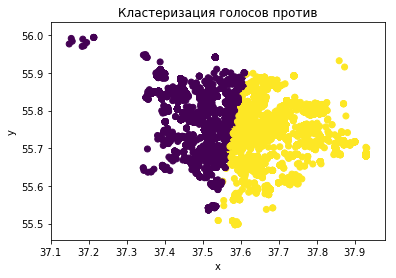

In [15]:
plt.scatter(geo[geo['comment_class'] == -1]['x'], geo[geo['comment_class'] == -1]['y'], c=output)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кластеризация голосов против');

In [16]:
dbscan_geo = DBSCAN(eps=1.2, min_samples=30)
output = dbscan_geo.fit_predict(geo[['comment_class','x', 'y']])

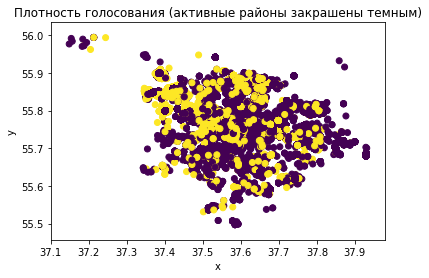

In [17]:
plt.scatter(geo['x'], geo['y'], c=output)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Плотность голосования (активные районы закрашены темным)');